# IMPORTING LIBRARIES

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [22]:
# Define the dataset
data = {
    'transaction_id': ['TRX001', 'TRX002', 'TRX003', 'TRX004', 'TRX005', 'TRX006', 'TRX007'],
    'date': ['2024-06-01', '2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02', '2024-06-03', '2024-06-03'],
    'category': ['Food', 'Utilities', 'Entertainment', 'Food', 'Transport', 'Utilities', 'Food'],
    'amount': [25.00, 150.00, 200.00, 3000.00, 45.00, 135.00, 20.00]
}

In [57]:
df.head()# Convert to DataFrame
df = pd.DataFrame(data)

# Analyzing Data

In [25]:
df.head()

,transaction_id,date,category,amount
0,TRX001,2024-06-01,Food,25.0
1,TRX002,2024-06-01,Utilities,150.0
2,TRX003,2024-06-01,Entertainment,200.0
3,TRX004,2024-06-02,Food,3000.0
4,TRX005,2024-06-02,Transport,45.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7 non-null      object 
 1   date            7 non-null      object 
 2   category        7 non-null      object 
 3   amount          7 non-null      float64
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes


In [58]:
df.isnull()

,transaction_id,date,category,amount
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False


# DATA CLEANING

In [28]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
    df = df.dropna() 

In [29]:
df

,transaction_id,date,category,amount
0,TRX001,2024-06-01,Food,25.0
1,TRX002,2024-06-01,Utilities,150.0
2,TRX003,2024-06-01,Entertainment,200.0
3,TRX004,2024-06-02,Food,3000.0
4,TRX005,2024-06-02,Transport,45.0
5,TRX006,2024-06-03,Utilities,135.0
6,TRX007,2024-06-03,Food,20.0


In [30]:
# Convert 'amount' column to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df

,transaction_id,date,category,amount
0,TRX001,2024-06-01,Food,25.0
1,TRX002,2024-06-01,Utilities,150.0
2,TRX003,2024-06-01,Entertainment,200.0
3,TRX004,2024-06-02,Food,3000.0
4,TRX005,2024-06-02,Transport,45.0
5,TRX006,2024-06-03,Utilities,135.0
6,TRX007,2024-06-03,Food,20.0


In [60]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,transaction_id,date,category,amount
0,TRX001,2024-06-01,Food,25.0
1,TRX002,2024-06-01,Utilities,150.0
2,TRX003,2024-06-01,Entertainment,200.0
3,TRX004,2024-06-02,Food,3000.0
4,TRX005,2024-06-02,Transport,45.0


# DATA VISUALIZATION

In [41]:
# Function to calculate mean and standard deviation for each category
def calculate_category_stats(df):
    category_stats = df.groupby('category')['amount'].agg(['mean', 'std']).reset_index()
    return category_stats

In [63]:
# Function to visualize data distribution
def visualize_data1(df, category_stats):
    plt.figure(figsize=(16, 12))
    
    # Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x='category', y='amount', data=df)
    plt.title('Boxplot of Transaction Amounts by Category')
    plt.xlabel('Category')
    plt.ylabel('Transaction Amount')
    
    # Violin plot
    plt.subplot(2, 2, 2)
    sns.violinplot(x='category', y='amount', data=df)
    plt.title('Violin Plot of Transaction Amounts by Category')
    plt.xlabel('Category')
    plt.ylabel('Transaction Amount')
    
    # Swarmplot
    plt.subplot(2, 2, 3)
    sns.swarmplot(x='category', y='amount', data=df, color='black', alpha=0.5)
    plt.title('Swarm Plot of Transaction Amounts by Category')
    plt.xlabel('Category')
    plt.ylabel('Transaction Amount')
    
    # Scatter plot with mean values
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='category', y='amount', data=df, color='blue', alpha=0.7)
    for index, row in category_stats.iterrows():
        plt.scatter(index, row['mean'], color='red', marker='o', s=100, label='Mean')
    plt.title('Scatter Plot with Mean Transaction Amounts by Category')
    plt.xlabel('Category')
    plt.ylabel('Transaction Amount')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [64]:
# Calculate category statistics
category_stats = calculate_category_stats(df)

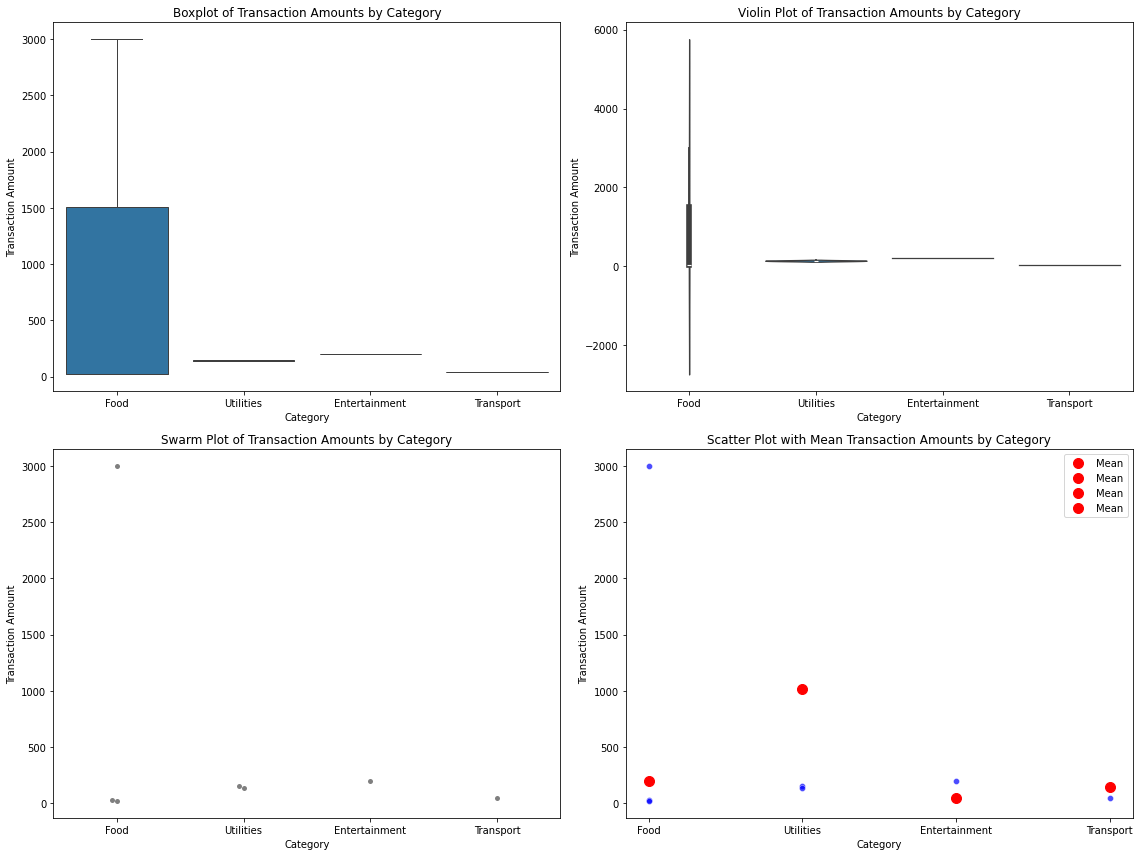

In [65]:
# Visualize data distribution
visualize_data1(df, category_stats)

# CALCULATION

In [46]:
# Function to detect anomalies
def detect_anomalies(df, category_stats):
    anomalies = []
    for index, row in df.iterrows():
        category = row['category']
        amount = row['amount']
        mean = category_stats.loc[category_stats['category'] == category, 'mean'].values[0]
        std_dev = category_stats.loc[category_stats['category'] == category, 'std'].values[0]
        
        # Calculate Z-score
        z_score = (amount - mean) / std_dev
        
        # Define a threshold (e.g., 3 standard deviations)
        threshold = 3
        
        if np.abs(z_score) > threshold:
            anomalies.append({
                'transaction_id': row['transaction_id'],
                'date': row['date'],
                'category': category,
                'amount': amount,
                'reason_for_anomaly': f'{np.abs(z_score)} standard deviations from the mean'
            })
    return anomalies


In [47]:
# Function to generate anomaly report
def generate_anomaly_report(anomalies):
    print("Detected Anomalies:")
    for anomaly in anomalies:
        print(f"Transaction ID: {anomaly['transaction_id']}")
        print(f"Date: {anomaly['date']}")
        print(f"Category: {anomaly['category']}")
        print(f"Amount: {anomaly['amount']}")
        print(f"Reason: {anomaly['reason_for_anomaly']}")
        print("------------------------")
    print(f"Total anomalies detected: {len(anomalies)}")

In [50]:
# Function to visualize data distribution and anomalies
def visualize_data(df, category_stats, anomalies):
    plt.figure(figsize=(14, 8))
    
    # Plot boxplot for each category
    plt.subplot(2, 1, 1)
    sns.boxplot(x='category', y='amount', data=df)
    plt.title('Boxplot of Transaction Amounts by Category')
    
    # Highlight anomalies on the boxplot
    for anomaly in anomalies:
        category = anomaly['category']
        amount = anomaly['amount']
        plt.plot(category_stats.loc[category_stats['category'] == category, 'mean'], 
                 marker='o', markersize=10, color='red')
        plt.text(x=len(category_stats[category_stats['category'] == category]), 
                 y=amount, s=f"{anomaly['transaction_id']}\n({anomaly['reason_for_anomaly']})", color='red')
          # Plot histogram for transaction amounts
    plt.subplot(2, 1, 2)
    plt.hist(df['amount'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Transaction Amounts')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


In [51]:
# Calculate category statistics
category_stats = calculate_category_stats(df)


In [52]:
# Detect anomalies and generate report
anomalies = detect_anomalies(df, category_stats)
generate_anomaly_report(anomalies)

Detected Anomalies:
Total anomalies detected: 0


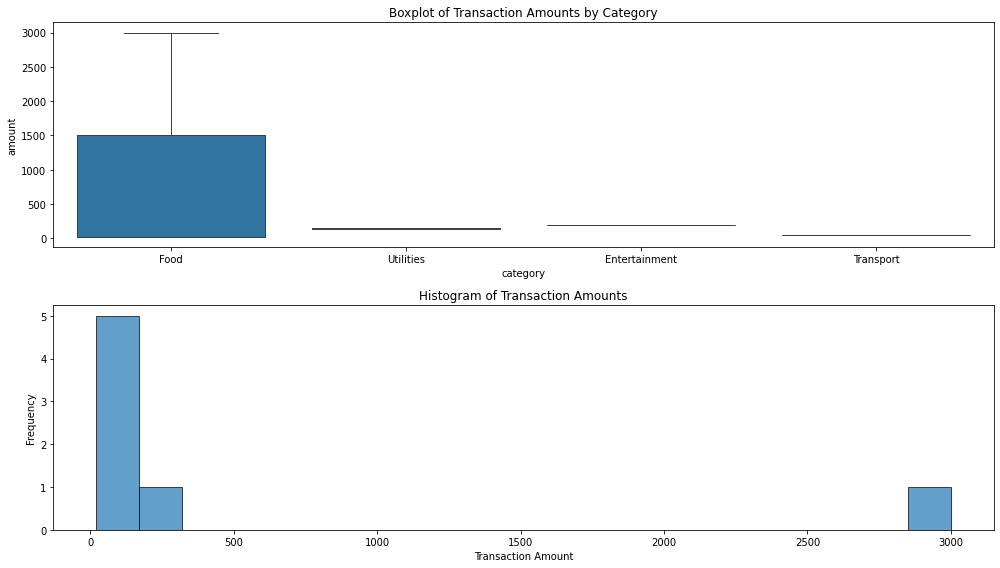

In [53]:
# Visualize data distribution and anomalies
visualize_data(df, category_stats, anomalies)